In [31]:
#Parkinson's disease is a progressive neurological disorder that affects movement.
#Stiffening, tremors and slowing down of movements may be signs of Parkinson's disease.
#While there is no certain diagnostic test, but we can use machine learning in predicting whether a person has Parkinson's disease based on specific biomarkers.
#Although, we will use machine learning models to predict Parkinson's disease.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [32]:
df = pd.read_csv('parkinson_disease.csv')
pd.set_option('display.max_columns', 10)
df.sample(5)
df.head()

,id,gender,PPE,DFA,RPDE,...,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,...,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,...,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,...,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,...,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,...,11.6891,8.2103,5.0559,6.1164,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,125.500000,72.793721,0.000000,62.750000,125.500000,188.250000,251.00000
gender,756.0,0.515873,0.500079,0.000000,0.000000,1.000000,1.000000,1.00000
PPE,756.0,0.746284,0.169294,0.041551,0.762833,0.809655,0.834315,0.90766
DFA,756.0,0.700414,0.069718,0.543500,0.647053,0.700525,0.754985,0.85264
RPDE,756.0,0.489058,0.137442,0.154300,0.386537,0.484355,0.586515,0.87123
...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,756.0,12.375335,16.341665,1.628700,3.114375,4.741450,12.201325,73.53220
tqwt_kurtosisValue_dec_34,756.0,14.799230,15.722502,1.861700,3.665925,6.725700,21.922050,62.00730
tqwt_kurtosisValue_dec_35,756.0,14.751559,14.432979,1.955900,3.741275,7.334250,22.495175,57.54430
tqwt_kurtosisValue_dec_36,756.0,31.481110,34.230991,2.364000,3.948750,10.637250,61.125325,156.42370


In [35]:
print("Number of Rows and Columns:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nBasic Statistics:")
display(df.describe())

print("\nMissing Values in Dataset:")
print(df.isnull().sum())

print("\nSample Rows:")
display(df.head(10))

Number of Rows and Columns: (756, 755)

Column Names: ['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses', 'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter', 'locShimmer', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity', 'minIntensity', 'maxIntensity', 'meanIntensity', 'f1', 'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'GQ_prc5_95', 'GQ_std_cycle_open', 'GQ_std_cycle_closed', 'GNE_mean', 'GNE_std', 'GNE_SNR_TKEO', 'GNE_SNR_SEO', 'GNE_NSR_TKEO', 'GNE_NSR_SEO', 'VFER_mean', 'VFER_std', 'VFER_entropy', 'VFER_SNR_TKEO', 'VFER_SNR_SEO', 'VFER_NSR_TKEO', 'VFER_NSR_SEO', 'IMF_SNR_SEO', 'IMF_SNR_TKEO', 'IMF_SNR_entropy', 'IMF_NSR_SEO', 'IMF_NSR_TKEO', 'IMF_NSR_entropy', 'mean_Log_energy', 'mean_MFCC_0th_coef', 'mean_MFCC_1st_coef', 'mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'mean_MFCC_4th_coef', 'mean_M

,id,gender,PPE,DFA,RPDE,...,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,...,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,...,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,...,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,...,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,...,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,...,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,...,73.532200,62.007300,57.544300,156.423700,1.000000



Missing Values in Dataset:
id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

Sample Rows:


,id,gender,PPE,DFA,RPDE,...,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,...,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,...,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,...,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,...,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,...,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,...,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,...,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,...,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,...,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,...,3.8415,3.9439,5.8807,38.7211,1


In [36]:
selected_features = ['tqwt_kurtosisValue_dec_34', 'tqwt_maxValue_dec_1', 'DFA', 'gender', 'class']
df_selected = df[selected_features]
display(df_selected.head())


,tqwt_kurtosisValue_dec_34,tqwt_maxValue_dec_1,DFA,gender,class
0,2.6202,0.014320,0.71826,1,1
1,6.5245,0.048874,0.69481,1,1
2,2.9199,0.006892,0.67604,1,1
3,4.8460,0.120480,0.79672,0,1
4,8.2103,0.059090,0.79782,0,1


In [37]:
df.isnull().sum().sum()

np.int64(0)

In [38]:
df = df.groupby('id').mean().reset_index()
df.drop('id', axis=1, inplace=True)

In [39]:
columns = list(df.columns)
for col in columns:
    if col == 'class':
        continue

    filtered_columns = [col]
    for col1 in df.columns:
        if((col == col1) | (col == 'class')):
            continue

        val = df[col].corr(df[col1])
        if val > 0.7:
            # If the correlation between the two features is more than 0.7, remove it
            columns.remove(col1)
            continue
        else:
            filtered_columns.append(col1)

    df = df[filtered_columns]
df.shape

(252, 287)

In [40]:
X = df.drop('class', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=30)
selector.fit(X_norm, df['class'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['class'] = df['class']
df = filtered_data
df.shape


(252, 31)

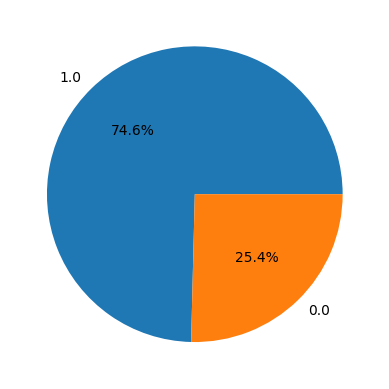

In [41]:
x = df['class'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()


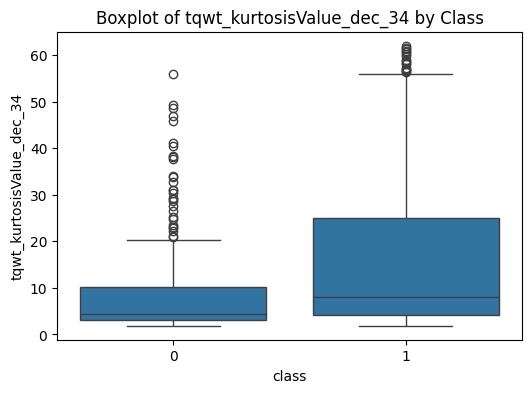

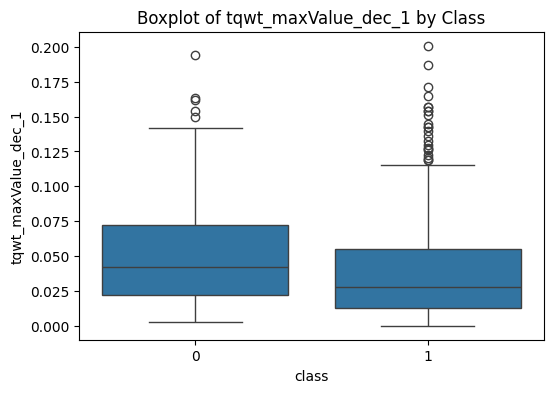

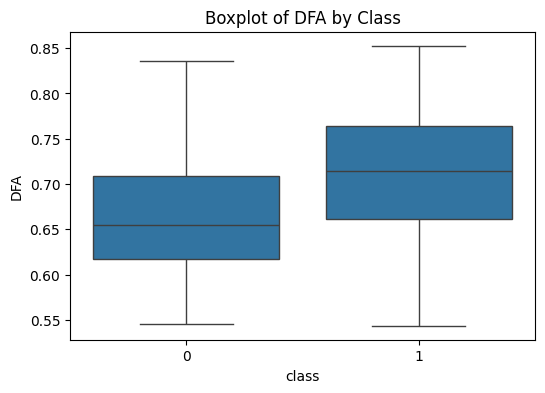

In [42]:
num_cols_selected = df_selected.select_dtypes(include=np.number).columns.drop(['class', 'gender'], errors='ignore')

for col in num_cols_selected:
    plt.figure(figsize=(6, 4))
    sb.boxplot(x='class', y=col, data=df_selected)
    plt.title(f"Boxplot of {col} by Class")
    plt.show()

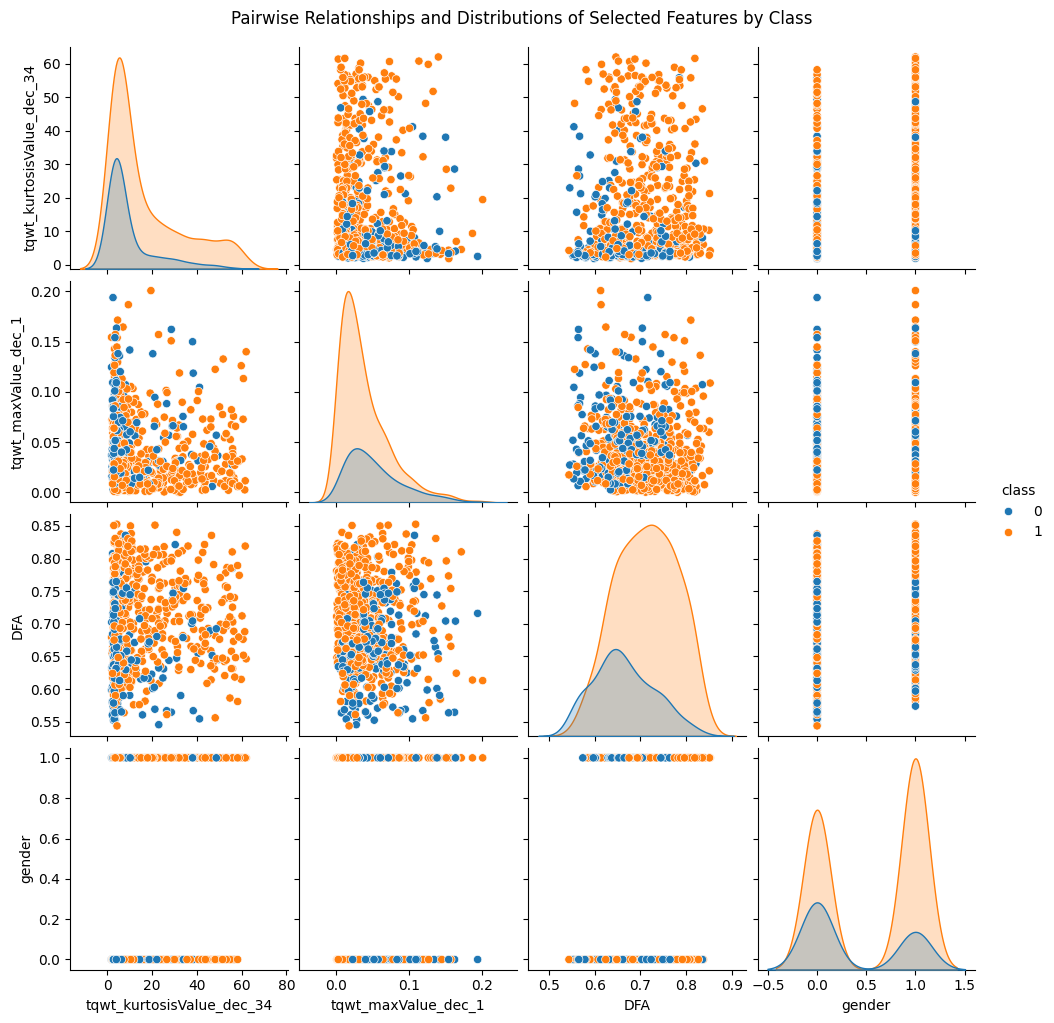

In [43]:
sb.pairplot(df_selected, hue='class')
plt.suptitle("Pairwise Relationships and Distributions of Selected Features by Class", y=1.02)
plt.show()

In [44]:
features = df.drop('class', axis=1)
target = df['class']

X_train, X_val,Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.2,
                                      random_state=10)

ros = RandomOverSampler(sampling_strategy=1.0,
                        random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.value_counts()

((302, 30),
 class
 1.0    151
 0.0    151
 Name: count, dtype: int64)

In [45]:
from sklearn.metrics import roc_auc_score as ras

models = [LogisticRegression(class_weight='balanced'), XGBClassifier(), SVC(kernel='rbf', probability=True)]
for model in models:
    model.fit(X, Y)
    print(f'{model} : ')

    train_preds = model.predict(X)
    print('Training Accuracy : ', ras(Y, train_preds))

    val_preds = model.predict(X_val)
    print('Validation Accuracy : ', ras(Y_val, val_preds))
    print()

LogisticRegression(class_weight='balanced') : 
Training Accuracy :  0.7516556291390728
Validation Accuracy :  0.8166023166023165

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.6467181467181468

SVC(probability=True) : 
Training Accu

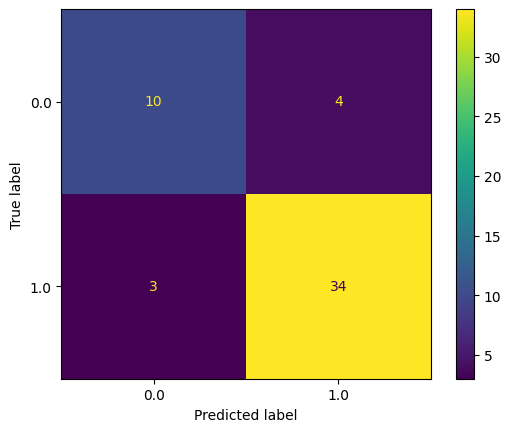

In [46]:
 from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()


In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, models[0].predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74        14
         1.0       0.89      0.92      0.91        37

    accuracy                           0.86        51
   macro avg       0.83      0.82      0.82        51
weighted avg       0.86      0.86      0.86        51

